# Computing for Research Day III -- Data Processing in `numpy`

Amanda Farah - afarah@uchicago.edu

Some cells are based on materials developed by Ziwei Wang for Bootcamp 2019

Before we get started today, please make sure you have filled out this survey so that we can grant you access to UChicago's computing cluster: https://forms.gle/vAScmYCX5Jh426zN6 

In [18]:
### Load python packages
import numpy as np 
import matplotlib.pyplot as plt
import os

### To mount google drive in runtime to access files in the drive so you can access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Before setting these paths, please make sure you can see the files in the "`data/day3`" directory. 

Then, copy them over to your `my_bootcamp_2020`

In [40]:
### Change the current working directory to folder on drive
homedir = '/content/drive/Shared drives/GEOS39650/Bootcamps 2020/Coding_2_planning/' 
os.chdir(homedir)
print("current directory is : " + homedir)

loaddir = '/content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data/day3/' #Make sure the paths end in '/'
savedir = '/content/drive/My Drive/my_bootcamp_2020/day3/'   # if you called your directory "my_bootcamp_2020"  
print("load directory is : " + loaddir)
print("save directory is : " + savedir)

current directory is : /content/drive/Shared drives/GEOS39650/Bootcamps 2020/Coding_2_planning/
load directory is : /content/drive/Shared drives/Coding_Bootcamps_2020/computing_for_research/data/day3/
save directory is : /content/drive/My Drive/my_bootcamp_2020/day3/


## Goals of this section: 

1.   Motivation: built in functions and computing speed
2.   Introducing numpy: Initializing array and ndarray. 
3.   Loading and saving files.
4.   Nitty gritties of indexing and slicing arrays 
5.   Masked arrays
6.   End-of-class practice: Calculate mean along certain dimensions
7. Linear Algebra


A good example to follow for introduction to numpy: <br> 
https://notebooks.azure.com/wesm/projects/python-for-data-analysis/html/appa.ipynb

Or, check out my `Day4_Intro_to_Numpy.ipynb` in the intro coding course materials.





## 1. Why Numpy?

1. `numpy` array-wise operations save time
2. Built in functions are plentiful and convenient
3. `ndarray`s are truly N-dimensional (unlike lists - you can get similar functionality with nested lists but there are many limitations). Having N-dimensional objects allows you to conveniently do operations along just one or a few axes.

### 1.1 Numpy arrays save time by avoiding loops over large lists
It's built-in functions for array-wise operations avoid having to loop over elements in lists or arrays. Here is a very basic example

In [20]:
def sum_with_loop():
    a = np.random.uniform(size=(100,10,5))
    a_sum = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            for n in range(a.shape[2]):
                a_sum += a[i,j,n]
    return a_sum

In [21]:
%%time 
y = sum_with_loop()
  

CPU times: user 2.62 ms, sys: 15 µs, total: 2.64 ms
Wall time: 2.5 ms


Now let's replace for-loops with np.sum. 

In [22]:
# Now replace for-loop with np.sum
def sum_with_numpy():
    a = np.random.uniform(size=(100,10,5))
    a_sum = 0 #This line is kept to keep consistency with previous function
    a_sum = np.sum(a)
    print()
    return a_sum

In [23]:
%%time
y = sum_with_numpy()


CPU times: user 599 µs, sys: 0 ns, total: 599 µs
Wall time: 428 µs


**Conclusion**: Using numpy built-in functions could save you a lot of time. Both computing time and your own personal time typing out all those extra lines of code!

All the built-in functions in `numpy` (too many to count) are each essentially to save a for loop... and are almost always the fastest way to do your operation. I cannot emphasize enough: **Never write a for loop when you can do array-wise operations with `numpy`!!**

1. sum
2. difference
3. standard deviation
4. mean
5. quantiles
6. sort

### 1.2 Built-in functions are plentiful and convenient
We won't spend time on them today since which functions you use most depend on your research topic, and you likely are familiar with some built in `numpy` functions already, but I still wanted to take this cell to appreciate the developers of `numpy`

The functions I am most grateful for in my research are `np.interp()`, `np.meshgrid()` and `np.percentile()` check them out!

#### For your future reference: built-in functions that save time!
Examples in this section make code run faster. We won't go through them in class time, but check them out on your own time or in office hours if you feel they would be relevant to your research.

In [ ]:
# Print the array we initialized before
arr = np.arange(12).reshape((4,3))
arr
# You try: start exploring numpy built-in functions
# 1. np.sum

# 2. np.std

# axis = 0; axis = 1



In [ ]:
arr = np.asarray(arr,dtype=float)
# mask out some elements to np.nan
arr[3,:] = np.nan
# 3. np.mean/np.nanmean 



In [ ]:
# np.difference 
np.diff(arr,axis=0) # axis=0: difference row-wise; axis-1: difference col-wise

For np.quantile/np.percentile, initialize a random array with integers. 

In [ ]:
# Use randint for percentile
arr = np.random.randint(10,size=11)

In [ ]:
print(sorted(arr))
np.percentile(arr,20)
# Equivalent to np.quantile (0~1)


Sorting the array directly and indirectly. 

In [ ]:
arr = np.random.randint(10,size=12).reshape((4, 3))
print('Original array: ')
print(arr)


In [ ]:
# This will happen inplace
arr.sort(axis=0)
print('Array after sorting: ')
print(arr)

In [ ]:
# This will not affect order in arr
arr1 = np.sort(arr,axis=1)
arr1

In [ ]:
### Sorting the array indirectly
arr = np.array([5, 0, 1, 3, 2])
# Sort by the index
indexer = arr.argsort() #default is ascending
print('The index of sorted array: ')
print(indexer)
print('Array sorted indirectly: ')
print(arr[indexer])


## 2. Initializing Arrays



**Tip: Initalization of arrays is always the slowest step. Minimize how many times you are creating arrays.** --> manipulate and write-to arrays whenever possible

numpy arrays are '0' indexed (the first item, dimension, etc. has index 0)





### 2.1 Make a 1D `numpy` array full of zeros/ones. 
e.g: `np.zeros((10)) np.ones((10))`

In [24]:
#here is an example:
print(np.zeros((10)))
print(np.ones((10)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### 2.2 Make an ndarray full of zeros/ ones/ np.nan
`a = np.zeros((3,3))`
`a.fill(np.nan)`


In [25]:
#Construct an ndarray
print('Construct 3x3 ndarray')
print(np.zeros((3,3)))

#now you try: initialize an ndarray a with ones
a = np.ones((3,3))#fill me in so you don't get an error!
print('Initialized with 1s, before filling with any specified element: ')
print(a)

#Now fill it with np.nan values
a.fill(np.nan)
print('Fill array with np.nan: ')
print(a)

Construct 3x3 ndarray
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Initialized with 1s, before filling with any specified element: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Fill array with np.nan: 
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]


### 2.3 Initialize an array of numbers placed in ascending order. 
There are two ways to do this: `linspace()` and `arange()` let's figure out which is better for what purpose

In [26]:
# np.linspace

print(np.linspace(0,9,num=40)) #default number of entries is 50

#Use dtype to change the output format, default is float
print(np.linspace(0,9,10,dtype=int))

[0.         0.23076923 0.46153846 0.69230769 0.92307692 1.15384615
 1.38461538 1.61538462 1.84615385 2.07692308 2.30769231 2.53846154
 2.76923077 3.         3.23076923 3.46153846 3.69230769 3.92307692
 4.15384615 4.38461538 4.61538462 4.84615385 5.07692308 5.30769231
 5.53846154 5.76923077 6.         6.23076923 6.46153846 6.69230769
 6.92307692 7.15384615 7.38461538 7.61538462 7.84615385 8.07692308
 8.30769231 8.53846154 8.76923077 9.        ]
[0 1 2 3 4 5 6 7 8 9]


In [27]:
# np.arange
# arange starts at zero by default
print(np.arange(5))
print(np.arange(0,10,dtype=float))

[0 1 2 3 4]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


#### 2.3.1 Reflect: What is the difference between linspace and arange?

What are the differences in default behavior? When might one be more useful than the other? Under what conditions do they make the same output?

Paste the answer to 'Under what conditions do they make the same output?' in the Slack

In [30]:
#use this cell to mess around to answer the above question
print(np.arange(30))
print(np.linspace(0,29,num=30,dtype=int))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


### 2.4 Initialze an array of random numbers

In [31]:
# Initializing a random matrix with specified dimensions

# np.random.randn: Return a sample (or samples) from the “standard normal” distribution.
a = np.random.randn(5,2)
#this should return a 5x2 array full of random samples from N(0,1)
a

array([[ 0.69349082, -0.08998172],
       [ 0.22770247, -0.66973406],
       [-0.61209426, -2.07591677],
       [ 0.96600412, -0.53255271],
       [-0.46036289,  0.24482182]])

### 2.5 Initialize from a list
Since we are all now convinced that `numpy` arrays are better than lists, how do we convert all our lists to `numpy` arrays?

In [32]:
# Initialize from a list
l = [0,1,2,3]
ll = np.array(l)
ll
#easy peasy!

array([0, 1, 2, 3])

Converting a list from and to `numpy`.


In [33]:
# Convert the ndarray back to list
del l #deletes l as a variable
l = list(ll)
l

[0, 1, 2, 3]

### 2.6 Check data type; size and shape of np arrays. 


1.   `type()` vs `np.dtype`
2.   `np.shape


In [34]:
### Inspect arrays ###
a = np.random.randn(5,2)
print(type(a))
print(a.dtype)

<class 'numpy.ndarray'>
float64


In [35]:
### Find the dimensions of your array ###
a.shape

(5, 2)

### 2.7: Check-in 1: Sizes vs. Lengths of ndarrays
Many of you may be familiar with using the built-in function `len()` or the `numpy` attribute `np.size()`. What is the difference between those two? Test them out on ndarray `a` to answer this question. Put your answer in the thread on Slack.

In [37]:
#this cell blank to mess around and answer above excercise
print(len(a))
print(a.size)

5
10


### 2.8 Aside: plotting 1d vs Nd data


*   1 dimensional data can be visualized as a histogram, a scatter plot, or a lineplot

*   2 dimensional data can be thought of as an image: each set of indicies `[row, column]` can define a pixel, and the value at that pixel indicates the color. You can also do contour plots but thats a whole 

* 3+ dimensional data requires some more creativity - this is where slicing comes in handy! You can take 1d or 2d cross sections of the data and plot those as lineplots and images, respectively.



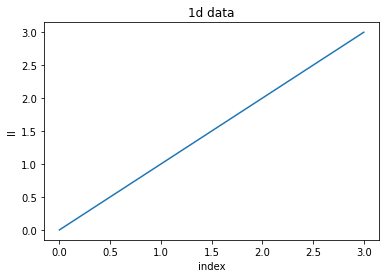

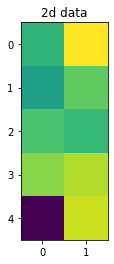

In [38]:
plt.plot(l)
plt.xlabel('index')
plt.ylabel('ll')
plt.title('1d data')
plt.show()

plt.imshow(a)
plt.title('2d data')
plt.show()

## 3. Reading and Saving Data: `numpy` with .txt, .csv, and .npy

### 3.1 Reading and saving in .npy form.

In [42]:
### For npy ###
# Save data to npy form
arr = np.arange(12).reshape((4,3))
# np.save(os.path.join(savedir,'test_save.npy'),arr)

In [ ]:
# Try to load the data
del arr
arr = np.load(savedir+'test_save.npy')
arr

### 3.2 .txt form
We will practice loading in a dataset that was saved in a .txt file. `np.genfromtxt()` assumes that .txt files are tab-dileneated, i.e. it thinks all data are separated by tabs and linebreaks. You can change this by setting a `delimiter` argument in the function.

We will practice on a dataset that contains measurements of how much a gravitational-wave detector moves as a function of the frequency of the thing that is moving it

In [45]:
#lets load in strain data that was taken from the LIGO Hanford detector on oct 24th 2015
strain = np.genfromtxt(loaddir+'LIGO_Hanford_strain_151024.txt')
#the first column is frequency in Hz and the second column is strain in cm
strain

array([[1.0000000e+01, 1.7445178e-20],
       [1.0125000e+01, 1.5082781e-20],
       [1.0250000e+01, 1.2580142e-20],
       ...,
       [5.9997500e+03, 2.4212841e-22],
       [5.9998750e+03, 2.6830386e-22],
       [6.0000000e+03, 1.3266444e-22]])

In [46]:
#note that this is equivalent to doing delimiter='   ' (3 spaces)
strain = np.genfromtxt(loaddir+'LIGO_Hanford_strain_151024.txt',delimiter='   ')
strain

array([[1.0000000e+01, 1.7445178e-20],
       [1.0125000e+01, 1.5082781e-20],
       [1.0250000e+01, 1.2580142e-20],
       ...,
       [5.9997500e+03, 2.4212841e-22],
       [5.9998750e+03, 2.6830386e-22],
       [6.0000000e+03, 1.3266444e-22]])

#### 3.2.1 Digression: plotting

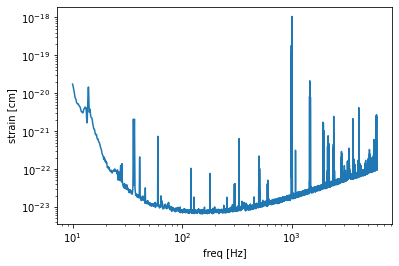

In [47]:
#digression - its good to get in the habit of always plotting data as soon as we open it
import matplotlib.pyplot as plt
plt.plot(strain[:,0],strain[:,1])
plt.xlabel('freq [Hz]')
plt.ylabel('strain [cm]')
plt.yscale('log')
plt.xscale('log')
plt.show()

### 3.3 .csv form
CSV stands for "comma-separated values." CSV files are just text files where the data is delimited by commas instead of tabs. 

#### 3.3.1 Check-in 2: `.csv` load and plot
Try loading in the dataset located at `loaddir+'star_formation_rate_MD.csv'` with the same function as above, but change the delimiter option to `','`

This dataset contains measurements of how fast stars are created as a function of how far away from us they are. The first column is a "redshift" which is kindof like a distance for cosmologists. The second column is a measurement of the $\log$ of the star formation rate at each redshift.

In [ ]:
#now you try: use np.genfromtxt() to load in the star formation rate dataset. save that dataset to a variable named sfr
#path: loaddir+'star_formation_rate_MD.csv'
sfr=
sfr

In [ ]:
#its always good to plot your data when you open it!
#first, figure out if the array you loaded should be plotted as a scatterplot, line plot, or an image based on its size


In [ ]:
#then, plot it that way!

#paste your plot on the thread in slack

#### Answer

In [48]:
sfr=np.genfromtxt(loaddir+'star_formation_rate_MD.csv',delimiter=',')
sfr

array([[ 1.018, -1.958],
       [ 1.055, -1.825],
       [ 1.026, -1.72 ],
       [ 1.124, -1.751],
       [ 1.151, -1.634],
       [ 1.262, -1.692],
       [ 1.308, -1.554],
       [ 1.292, -1.507],
       [ 1.377, -1.416],
       [ 1.485, -1.437],
       [ 1.533, -1.315],
       [ 1.56 , -1.215],
       [ 1.693, -1.241],
       [ 1.693, -1.198],
       [ 1.699, -1.135],
       [ 1.877, -1.108],
       [ 2.008, -1.229],
       [ 1.899, -0.933],
       [ 2.14 , -1.022],
       [ 2.174, -0.954],
       [ 2.098, -0.938],
       [ 2.106, -0.801],
       [ 2.131, -0.837],
       [ 2.449, -0.948],
       [ 2.589, -0.931],
       [ 2.459, -0.826],
       [ 2.77 , -0.741],
       [ 2.837, -0.857],
       [ 3.071, -0.793],
       [ 3.121, -0.735],
       [ 3.299, -0.74 ],
       [ 3.234, -0.851],
       [ 3.247, -0.893],
       [ 3.761, -0.866],
       [ 4.024, -0.966],
       [ 4.008, -1.029],
       [ 4.624, -1.345],
       [ 4.831, -1.271],
       [ 5.006, -1.678],
       [ 6.01 , -1.396],


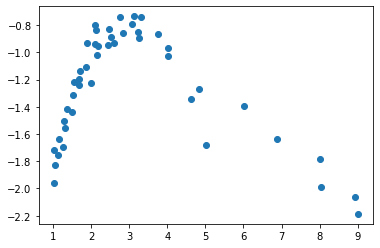

In [50]:
#I notice that this dataset has two columns, so I'm going to plot one agaisnt the other
plt.scatter(sfr[:,0],sfr[:,1])
plt.show()

In [ ]:
'''
I then notice that the y axis is negative and go look at the note I wrote about this dataset, 
where I mentioned that the second column is the log of the star formation rate (SFR). 
To make the plot more intuitive to myself and to boast my array-wise operation skills, 
I will plot the SFR isntead of the log of the SFR. 
If you didn't do this part, no worries, it was not really part of the exercise
'''
plt.plot(sfr[:,0],np.power(10.,sfr[:,1]),'o') #this is another way to make a scatter plot in matplotlib
plt.xlabel('redshift')
plt.ylabel('SFR')
plt.show()

## 4. Indexing Numpy Arrays


### 4.1 Slicing
Slicing is useful when you want to select a range of data in your array that you can specify by one or more indices. We use colons to slice arrays.

*   Keep all elements: `[:]`.
*   Explicitly specify start and end element `[start:stop]`.
*   Specify the step/increment `[start:stop:step]`






In [51]:
# 2d array
a = np.arange((12)).reshape((6,2))
print(a)
print('just look at the middle 4 rows of the 2d array')
print(a[1:5,:])

# 1d array
arr = np.arange((12))
print('look at every other element of the 1d array, from the 0th to the 8th')
print(arr[0:8:2])

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
just look at the middle 4 rows of the 2d array
[[2 3]
 [4 5]
 [6 7]
 [8 9]]
look at every other element of the 1d array, from the 0th to the 8th
[0 2 4 6]


#### Check-in 3: Slicing
Reflect: what do you think this will return: `a[0:8:2]` ?
Guess before you try in the cell below. Put your guess in the thread on Slack.

In [55]:
#now you try: what will a[0:8:2] return?
a[0:8:2,:]

array([[0, 1],
       [4, 5],
       [8, 9]])

### 4.2 Specifying  elements
you can also indicate explicitly which elements you want:


*   1d array: `[[element1,element2]]`
*   2d array (specify rows): `[[row1,row2],:]` means all of rows `row1` and `row2`
*   2d array (specify columns): `[:,[col1,col2]]`
*   2d array (specify coordinates: row and column): `[[row1,row3],[col4,col6]]`



In [ ]:
#specify elements for 1d array
print(np.random.random(12)[[1,3,4]])
#you can also indicate explicitly which rows you want
print(a[[1,3,4],:])
#and which coordinates
print(a[[1],[0]])


#### 4.2.1 Check-in 4: reverse an array
To output an array with elements in the reverse order of an original array:
*   Use `np.flip()`
*   Use `::-1`



In [ ]:
# Now you try: reverse the array called arr using the methods described in the cell immediately above


##### Answer

In [ ]:
print(np.flip(arr))
print(arr[::-1])
#they give the same thing!

### 4.3 Boolean Indexing
Index the array using customized conditions/Boolean operators. If you have an array `arr` with contents of any dtype and size `N x M` and an array `bool_arr` with Boolean contents and same size `N x M`, `arr[bool_arr]` will return the values of `arr` where `bool_arr` is `True`. 

This is a quick-and-dirty way to "mask." 

There are certain masks its really hard to create with simple Boolean operations, which we will use masked arrays for. We will get to fully masked arrays later.


In [57]:
arr = np.arange((12))
#Pick out the ones that are odd numbers
loc = (arr % 2 == 1)
print(loc)
print(arr[loc])

[False  True False  True False  True False  True False  True False  True]
[ 1  3  5  7  9 11]


In [58]:
#even numbers
print(arr[(arr % 2 == 0)])

[ 0  2  4  6  8 10]


Note that Boolean indexing outputs a different sized array than the original!

### 4.3.1 More examples of Boolean indexing

In [59]:
#Pick out the ones larger than certain number
print(arr[np.where(arr > 3)])
#the below works just as well for simple boolean operations
print(arr[arr>3])

[ 4  5  6  7  8  9 10 11]
[ 4  5  6  7  8  9 10 11]


In [60]:
# if you want multiple or complicated conditions, try using np.logical_and() or np.logical_or()
loc = np.logical_and(arr>3, arr<10)
arr[loc]

array([4, 5, 6, 7, 8, 9])

#### 4.3.6 Check-in 5: your own Boolean indexing

ask any questions you have in the slack!

In [61]:
# now you try: make an array or list of booleans that has the same length as arr_to_index
arr_to_index = np.arange(5)
bool_array = np.array([True,False,False,False,True])

In [63]:
# then, use that array to index arr. Try to predict what you will get before you run the cell
arr_to_index[bool_array]

array([0, 4])

## 5. Check-in 6: Slicing and Dicing
1. load in `'GBM_sensitivity_vs_redshift.csv'`, located under `loaddir+'data/'`. This dataset contains the sensitivity of a satellite to the brightness of faraway stars exploding (column 1) as a function of the distance to those explosions (column 0)
2. print last 10 items (slice the array)
3. print the elements of the array with distance between `1e-1` and `9e-1`
4. find the mean distance (column 0) of points with sensitivity greater than `5e50`

paste your answer to part 4 in the thread on the Slack. You'll get lots of time for this excercise


In [ ]:
## blank cell

#### Answer

In [66]:
## answer cell
sens_curve  = np.genfromtxt(loaddir+'GBM_sensitivity_vs_redshift.csv',delimiter=',')
print('last 10 elements:')
print(sens_curve[-10:])
print('distance between 1e-1 and 9e-1')
print(sens_curve[np.logical_and(sens_curve[:,0]>1e-1,sens_curve[:,0]<9e-1)])
print('mean distance of points with sensitivity greater than 5e50')
print(np.mean(sens_curve[sens_curve[:,1]>5e50],axis=0)[0])

last 10 elements:
[[3.24183791e+00 2.42018656e+52]
 [3.48642282e+00 2.79198013e+52]
 [3.66310608e+00 3.21948460e+52]
 [3.90769100e+00 3.71406782e+52]
 [4.08430479e+00 3.99055341e+52]
 [4.30176377e+00 4.76832877e+52]
 [4.49199262e+00 5.30802238e+52]
 [4.66860641e+00 5.70316641e+52]
 [4.85887000e+00 6.57700183e+52]
 [5.10335072e+00 6.82425654e+52]]
distance between 1e-1 and 9e-1
[[1.17180494e-01 7.13496370e+48]
 [1.38019880e-01 1.14977017e+49]
 [1.65597333e-01 1.75724049e+49]
 [1.93174786e-01 2.68566207e+49]
 [2.34263107e-01 3.82488771e+49]
 [2.75386160e-01 5.64327714e+49]
 [3.30124279e-01 8.62635494e+49]
 [3.84827665e-01 1.27285198e+50]
 [4.39461586e-01 1.74999880e+50]
 [5.21290905e-01 2.49297971e+50]
 [6.03189689e-01 3.81145212e+50]
 [6.98634073e-01 5.62541694e+50]
 [8.48434520e-01 8.60430685e+50]]
mean distance of points with sensitivity greater than 5e50
2.7603272414968996


## Break

See you in 10 mins! Remember to fill out the poll :)

## 6. Masked Arrays
When an element of the mask is False, the corresponding element of the associated array is valid and is said to be unmasked. When an element of the mask is True, the corresponding element of the associated array is said to be masked (invalid). Note that this may be opposite of what you are used to if you work with Boolean indexing a lot. \\

Masked arrays in `numpy` are made with the `np.ma` module

In [67]:
a = np.arange(0,20,dtype=int)
#Mask out the elements larger than 10
masked_a = np.ma.masked_where(a>10, a)

print(masked_a) #masked array
print(masked_a.data, masked_a.mask) #original array and mask

[0 1 2 3 4 5 6 7 8 9 10 -- -- -- -- -- -- -- -- --]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [False False False False False False False False False False False  True
  True  True  True  True  True  True  True  True]


In [68]:
print('Mean value of masked array a is: ')
print(masked_a.mean()) #this is the mean of unmasked values

Mean value of masked array a is: 
5.0


### 6.1 Mask by design
The above is achieving the same thing that we got with Boolean indexing, so when do masks come in handy? Usually, they are useful when you design your own mask or when you need the data to keep the same shape as the original array.

Construct a mask by design: 

In [69]:
a = np.arange(0,20,dtype=int)
#lets make an arbitrary mask
mask = [True for i in range(20)]
mask[0:3] = [False for i in range(3)]

masked_a = np.ma.masked_where(mask,a)
print(masked_a)

#btw, you can also get the same thing with np.ma.array() - you use whatever is more intuitive to you
print(np.ma.array(a, mask=mask))

[0 1 2 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
[0 1 2 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]


In [70]:
# sidenote: here's a nice trick to select the opposite of a mask that you may have 
opposite_mask = masked_a.mask == False
print(opposite_mask)
# its the same as np.logical_not(masked_a.mask)

[ True  True  True False False False False False False False False False
 False False False False False False False False]


### 6.2 Shapes of masked arrays
Ok, maybe there is some roundabout way to get the above result with Boolean indexing. But, can Bools do this?

In [71]:
ndarr = np.arange(15).reshape(3,5) #this is a 3x5 2darray
#check: is this also a 3x5 2darray?
np.ma.masked_where(ndarr>3,ndarr) 

masked_array(
  data=[[0, 1, 2, 3, --],
        [--, --, --, --, --],
        [--, --, --, --, --]],
  mask=[[False, False, False, False,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],
  fill_value=999999)

In [72]:
#try with Boolean indexing:
ndarr[ndarr>3] #this is a 1d array. womp womp.

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 6.3 Practical examples of masking
 A common use of masking is when you combine a dataset with a catalog. 
* For example, if you want to look at the night sky everywhere except for where the stars are, you would have a dataset of the night sky and a catalog of the locations of stars. Then, you would use that catalog as your mask. 
* Another example is if you want to look at the whole earth except for where lakes are. Then, you would have a dataset of the earth and a catalog of the locations of lakes. Your lake catalog would be your mask.

## 7. Check-in 7: Calculate mean temperatures over land


1. **Load reanalysis data** - this is a gridded dataset of weather over globe. Each grid cell has an associated latitude and longitude, as well as a bunch of weather data. It also comes with an array you can use as a catalog to distinguish land and sea. I'll load the dataset for you from the `.npy` format.
2. Subset the temperature data into land and ocean. Here, temperature data is your dataset, and the catalog of land and sea needs to be used as a mask.
3. Take the mean over all land data
4. Take the mean over all sea data

paste your answers to (3) and (4) in the slack thread. You will be given a good amount of time for this excercise.






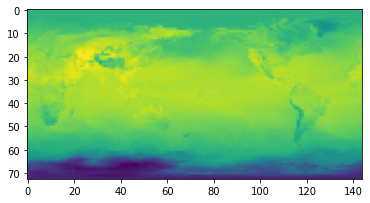

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5 20.  22.5] [90.  87.5 85.  82.5 80.  77.5 75.  72.5 70.  67.5]
(73, 144)


In [73]:
# Read datasets
lon = np.load(loaddir+'lon.npy')
lat = np.load(loaddir+'lat.npy')
temp = np.load(loaddir+'temp.npy')
land_sea_catalog = np.load(loaddir+'land_sea_catalog.npy')

#check out the data
import matplotlib.pyplot as plt
plt.imshow(temp)
plt.show()
print(land_sea_catalog)
print(lon[:10],lat[:10])
# Check dimensions
print(temp.shape)

2205


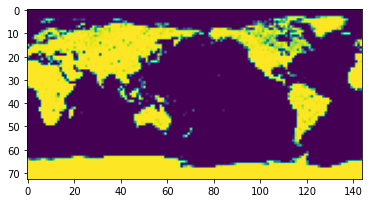

In [74]:
# Land sea catalog is a fractional number from 0 (sea) to 1 (land)
print(len(np.where((land_sea_catalog > 0) & (land_sea_catalog <1))[0]))
plt.imshow(land_sea_catalog)
plt.show()

Construct masked array of land/ocean <br>
The data has fractional values in the range 0 (sea) to 1 (land). Here we can make a simple assumption to take grids with more than 50% land as a land grid, and vice versa.  

In [ ]:
#now you try: make a mask out of your catalog of land and sea
#remember that we decided that if land_sea_catalog is less than 0.5, that data is sea
land_mask = #put a logical statement here using land_sea_catalog
ocean_mask = 

In [ ]:
#now you try: use the masks you constructed above to make masked arrays out of temp
temp_masked_ocean = 
temp_masked_land = 

Again, its always good to plot your data every time you make a change so you can really understand what you're doing. Its also cool to see how plotting functions deal with masked data.


In [ ]:
#plot your masked ocean and land temperature data here

Calculate the mean over land and ocean separately

In [ ]:
#now you try: calculate the mean temperature over land and sea separately

#### Answer

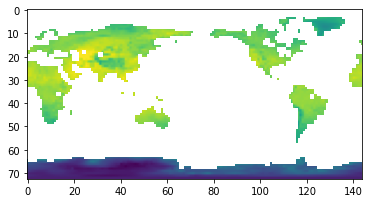

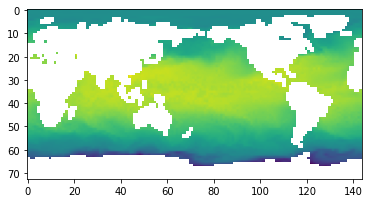

Mean temperature over land is  270.1
Mean temperature over ocean is  285.59


In [75]:
# answer
land_mask = land_sea_catalog < 0.5
ocean_mask = land_mask == False

temp_land = np.ma.masked_array(temp, mask=(land_mask)) # mask out ocean
temp_ocean = np.ma.masked_array(temp, mask=(ocean_mask)) # mask out land

plt.imshow(temp_land)
plt.show()
plt.imshow(temp_ocean)
plt.show()

print('Mean temperature over land is ', round(np.mean(temp_land),2))
print('Mean temperature over ocean is ', round(np.mean(temp_ocean),2))

## 8. Linear Algebra
In numpy, 1d arrays are like vectors and 2d arrays are like matricies. We can do simple linear algebra operations on them easily. This comes in handy when you need to solve systems of equations, approximate integrals, and otherwise combine multiple arrays. Lets check out some of the basic capabilites

In [78]:
#make a 3x4 2d array of your choosing:
arr_linalg = np.random.uniform(size=(3,4))
arr_linalg

array([[0.39201441, 0.32185123, 0.52720201, 0.67838919],
       [0.64411731, 0.49995445, 0.94355012, 0.79926202],
       [0.83493415, 0.28357434, 0.49545272, 0.65560165]])

#### Answer

this is just one way you could have done it

In [ ]:
arr_linalg = np.random.random(size=(3,4)) 

### 8.1 Matrix Properties
* Transpose: flip axes 0 and 1 of array `arr` with command `arr.T`
*   Diagonal: list the elements on the diagonal of a matrix `arr` with `arr.diagonal()`
* Trace: list the sum of the diagonal elements with `arr.trace()`

In [79]:
print(arr_linalg)
#transpose the matrix arr_linalg
#before you run the cell, try to predict what the outcome will be. 
print(arr_linalg.T) 

[[0.39201441 0.32185123 0.52720201 0.67838919]
 [0.64411731 0.49995445 0.94355012 0.79926202]
 [0.83493415 0.28357434 0.49545272 0.65560165]]
[[0.39201441 0.64411731 0.83493415]
 [0.32185123 0.49995445 0.28357434]
 [0.52720201 0.94355012 0.49545272]
 [0.67838919 0.79926202 0.65560165]]


In [85]:
#now you try: return the diagonal of the matrix
np.sum(np.diagonal(arr_linalg))

1.3874215841659996

In [84]:
#now you try: return the trace of the matrix. Check and see if this is the sum of the diagonal components
np.trace(arr_linalg)

1.3874215841659996

#### Answer

In [ ]:
print(np.diag(arr_linalg)) #this is the same as np.diagonal() This is why I love numpy - they work so hard to make function calls guessable
print(np.trace(arr_linalg))

### 8.2 Dot Products


In [86]:
vec_1 = np.arange(5,dtype=float)
vec_2 = np.random.uniform(size=5)
vec_1.dot(vec_2)

5.965561990997074

### 8.3 Matrix multiplication

Matrix multiplication is really annoying and tedious if you ever have to do it, so its nice that numpy has built-in functions to do it for you!

In [87]:
#make two 5x5 2D arrays
arr_1 = np.arange(25).reshape(5,5)
arr_2 = np.arange(25,50).reshape(5,5)

#and one length 5 1d array
vec_1 = np.arange(5)

In [88]:
vec_1

array([0, 1, 2, 3, 4])

In [89]:
print('array 1 matrix multiplied with array 2: ', np.matmul(arr_1,arr_2))
print('vector 1 matrix multiplied with array 1: ', np.matmul(vec_1,arr_1))

array 1 matrix multiplied with array 2:  [[ 400  410  420  430  440]
 [1275 1310 1345 1380 1415]
 [2150 2210 2270 2330 2390]
 [3025 3110 3195 3280 3365]
 [3900 4010 4120 4230 4340]]
vector 1 matrix multiplied with array 1:  [150 160 170 180 190]
